In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [3]:
# 시계열 데이터 생성
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성
data = pd.DataFrame({'Date':dates, 'Value': values})
print(data)

# 결측치 생성
# 100 - 200 = NAN
data.loc[100:200, 'Value'] = np.nan

# 결측치 생성 확인 체크
print(data.loc[100:200])

          Date     Value
0   2023-01-01  0.496714
1   2023-01-02 -0.138264
2   2023-01-03  0.647689
3   2023-01-04  1.523030
4   2023-01-05 -0.234153
..         ...       ...
995 2025-09-22 -0.281100
996 2025-09-23  1.797687
997 2025-09-24  0.640843
998 2025-09-25 -0.571179
999 2025-09-26  0.572583

[1000 rows x 2 columns]
          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


In [4]:
# 스플라인 보간법은 유효한 데이터에 대해서만 적용할 수 있기 때문에,
# 결측치를 제거하거나 대처하는 작업이 필요합니다. 
# 결측치 처리 (보간법 적용)
data['Value_filled'] =data['Value'].interpolate(method='linear')
print(data.loc[100:200])

          Date  Value  Value_filled
100 2023-04-11    NaN     -0.226789
101 2023-04-12    NaN     -0.218992
102 2023-04-13    NaN     -0.211194
103 2023-04-14    NaN     -0.203396
104 2023-04-15    NaN     -0.195598
..         ...    ...           ...
196 2023-07-16    NaN      0.521796
197 2023-07-17    NaN      0.529593
198 2023-07-18    NaN      0.537391
199 2023-07-19    NaN      0.545189
200 2023-07-20    NaN      0.552987

[101 rows x 3 columns]


In [5]:
# 스플라인 보간법 적용
spl = CubicSpline(data.index, data['Value_filled'])
data['Value_spline'] = spl(data.index)
print(data.loc[100:200])

          Date  Value  Value_filled  Value_spline
100 2023-04-11    NaN     -0.226789     -0.226789
101 2023-04-12    NaN     -0.218992     -0.218992
102 2023-04-13    NaN     -0.211194     -0.211194
103 2023-04-14    NaN     -0.203396     -0.203396
104 2023-04-15    NaN     -0.195598     -0.195598
..         ...    ...           ...           ...
196 2023-07-16    NaN      0.521796      0.521796
197 2023-07-17    NaN      0.529593      0.529593
198 2023-07-18    NaN      0.537391      0.537391
199 2023-07-19    NaN      0.545189      0.545189
200 2023-07-20    NaN      0.552987      0.552987

[101 rows x 4 columns]


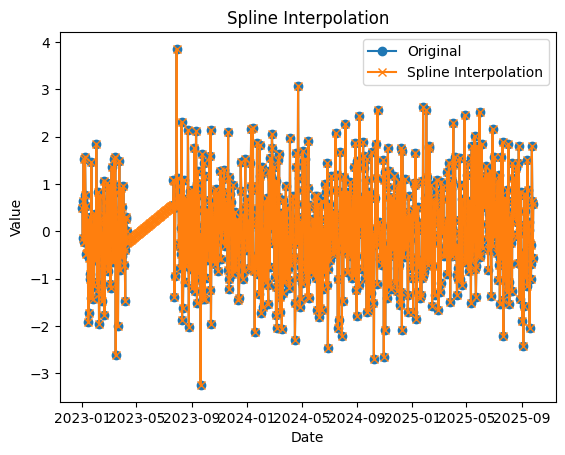

In [7]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], 'o-', label='Original')
plt.plot(data['Date'], data['Value_spline'], 'x-', label='Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Spline Interpolation')
plt.legend()
plt.show()

 ### 스플라인 보간법 -> 연속성 있는 데이터에서 적용됩니다. !! 결측값제거하거나 다른 방법으로 대처 하시고 진행해야합니다.